<a href="https://colab.research.google.com/github/111Vidya/DS-Assignments/blob/main/Project_Power_Plant_Vidya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Objective:
A combined-cycle power plant comprises gas turbines, steam turbines, and heat recovery steam generators. In this type of plant, the electricity is generated by gas and steam turbines combined in one cycle. Then, it is transferred from one turbine to another.

Goal Definition:
We have to model the energy generated as a function of exhaust vacuum and ambient variables and use that model to improve the plant's performance.


The variables, or features, are the following:
*  F1-temperature, in degrees Celsius.
*  F2-exhaust_vacuum, in cm Hg.
*  F3-amb_pressure, in millibar. (Ambient pressure)
*  F4-r_humidity, in percentage. (Relative humidity)
*  Target Variable-energy_production, in MW, net hourly electrical energy output.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pp=pd.read_csv("Copy of energy_production (1).csv",delimiter=";")
pp

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


##Exploratory Data Analysis##

In [ ]:
pp.shape

(9568, 5)

In [ ]:
pp.head(15)

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
5,23.63,60.93,1006.41,83.06,439.90
6,22.99,61.02,1009.88,81.56,440.85
7,12.85,40.00,1015.89,68.85,463.74
8,29.88,68.08,1011.14,55.78,429.33
9,23.22,66.56,1002.47,85.39,437.11


In [ ]:
pp.tail(10)

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
9558,11.81,40.75,1016.13,84.14,477.22
9559,14.73,40.35,1011.15,65.20,470.03
9560,25.84,69.14,1009.22,88.47,431.35
9561,21.90,63.13,1011.54,81.83,447.40
9562,21.85,63.86,1020.16,68.84,445.62
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57
9567,17.75,49.25,1020.86,63.67,454.41


In [ ]:
pp.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

In [ ]:
pp.dtypes

temperature          float64
exhaust_vacuum       float64
amb_pressure         float64
r_humidity           float64
energy_production    float64
dtype: object

In [ ]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
pp.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
pp["temperature"].var()

55.53935723806979

In [ ]:
pp.var()

temperature           55.539357
exhaust_vacuum       161.490544
amb_pressure          35.269152
r_humidity           213.167848
energy_production    291.282318
dtype: float64

In [ ]:
pp.isnull()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9563,False,False,False,False,False
9564,False,False,False,False,False
9565,False,False,False,False,False
9566,False,False,False,False,False


In [ ]:
# There are '0' null values in our dataset
pp.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [ ]:
# A total of 41 rows that are Dupliactes in our dataset
pp[pp.duplicated()].shape

(41, 5)

In [ ]:
pp[pp.duplicated()]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2066,10.72,41.17,1019.68,60.71,479.21
2780,28.41,75.60,1018.48,56.07,440.28
3333,24.79,75.60,1017.07,68.23,440.05
3467,7.64,41.17,1020.01,75.14,488.53
3550,25.42,75.60,1017.39,77.63,438.24
3747,11.61,41.17,1019.57,58.82,476.81
4292,12.27,41.17,1019.41,58.10,475.13
4528,24.63,59.57,1010.45,85.36,440.67
5065,8.57,41.17,1020.18,72.47,484.20
5564,11.82,41.17,1019.50,55.74,475.61


In [ ]:
pp.drop_duplicates().reset_index(drop="True")

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9522,17.10,49.69,1005.53,81.82,457.32
9523,24.73,65.34,1015.42,52.80,446.92
9524,30.44,56.24,1005.19,56.24,429.34
9525,23.00,66.05,1020.61,80.29,421.57


##Visualizations##

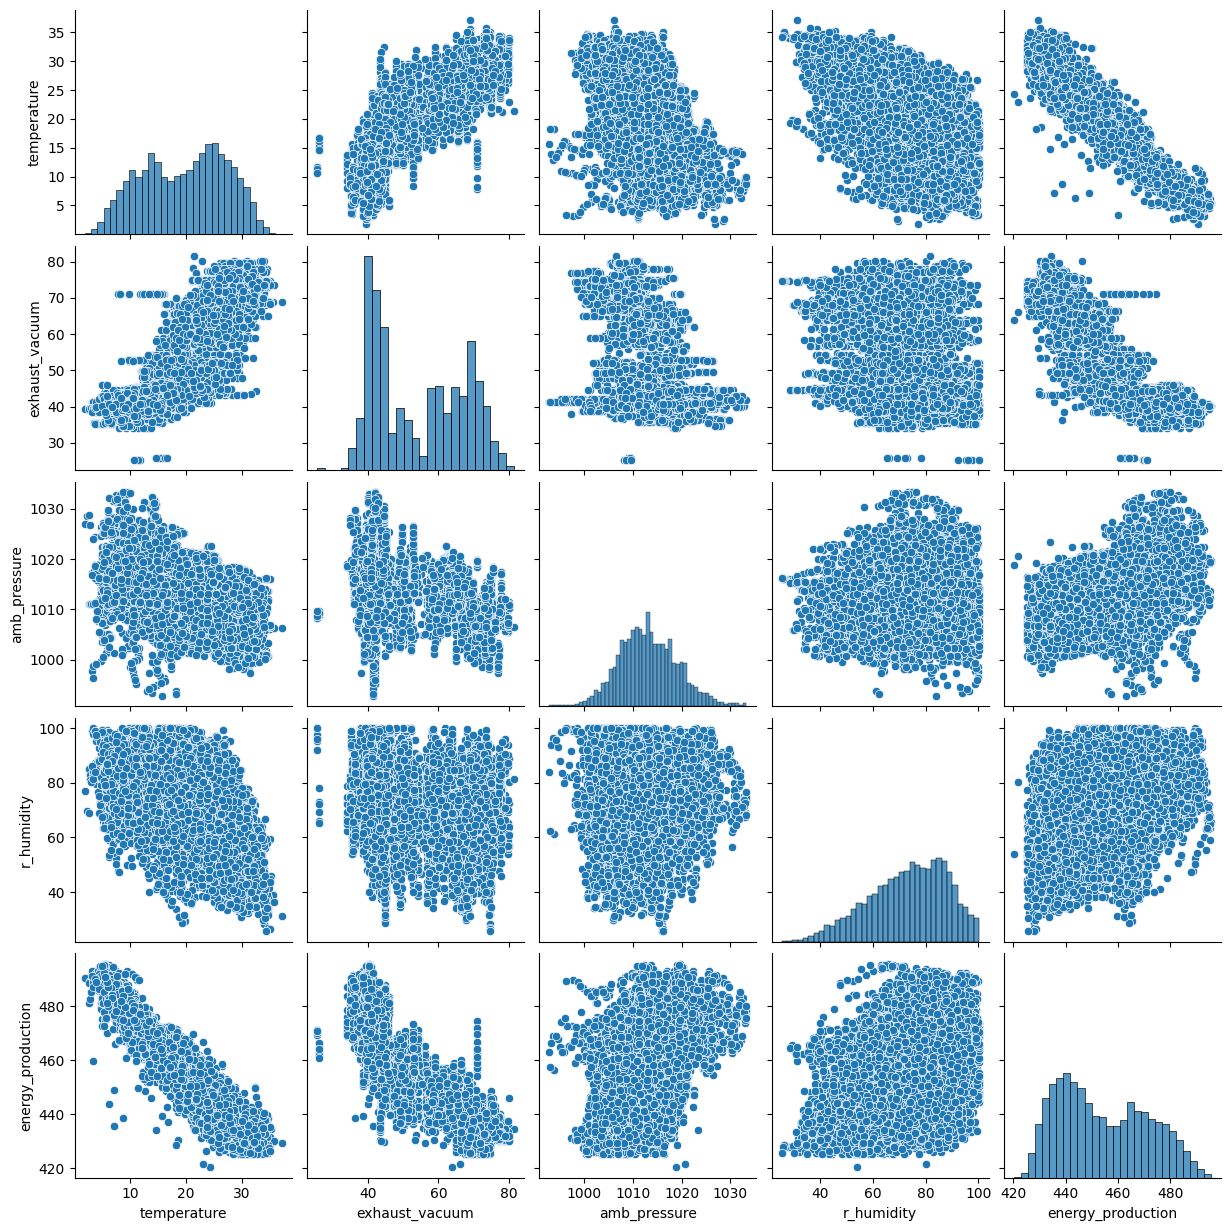

In [ ]:
# Identifiying relationships between variables and distribution in our dataset
sns.pairplot(pp)

In [ ]:
pp.skew()

temperature         -0.136393
exhaust_vacuum       0.198521
amb_pressure         0.265445
r_humidity          -0.431839
energy_production    0.306509
dtype: float64

In [ ]:
pp.kurt()

temperature         -1.037549
exhaust_vacuum      -1.444337
amb_pressure         0.094237
r_humidity          -0.444526
energy_production   -1.048521
dtype: float64

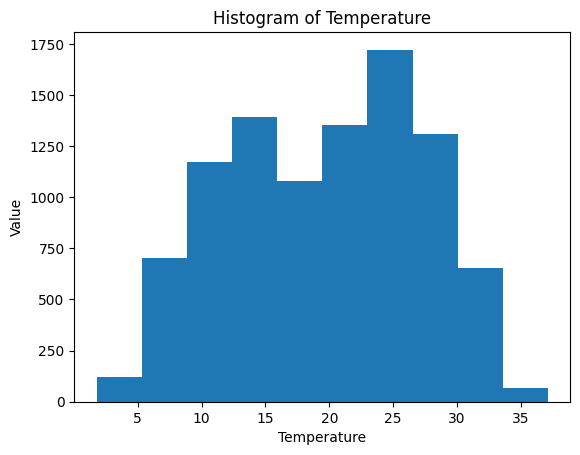

In [ ]:
import warnings
warnings.filterwarnings("ignore")
plt.hist(pp["temperature"])
plt.xlabel('Temperature')
plt.ylabel('Value')
plt.title('Histogram of Temperature')
plt.show()

Text(0.5, 1.0, 'Histogram of Enegry Production')

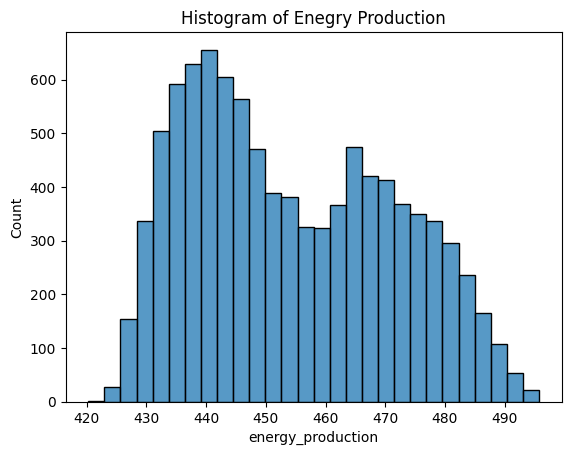

In [ ]:
sns.histplot(pp["energy_production"])
plt.title("Histogram of Enegry Production")

Text(0.5, 1.0, 'Histogram of Exhaust Vaccum')

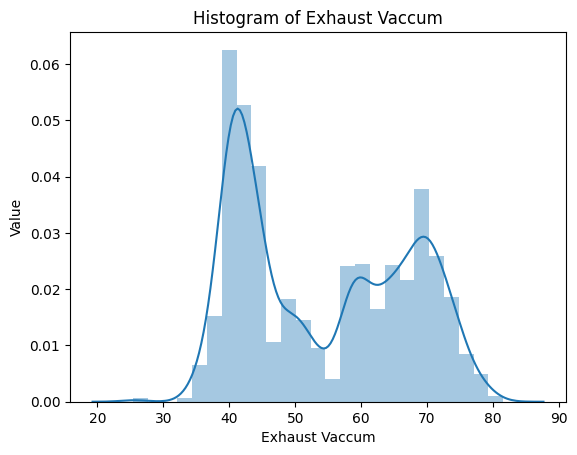

In [ ]:
sns.distplot(pp["exhaust_vacuum"])
plt.xlabel('Exhaust Vaccum')
plt.ylabel('Value')
plt.title('Histogram of Exhaust Vaccum')

<Axes: xlabel='amb_pressure', ylabel='Density'>

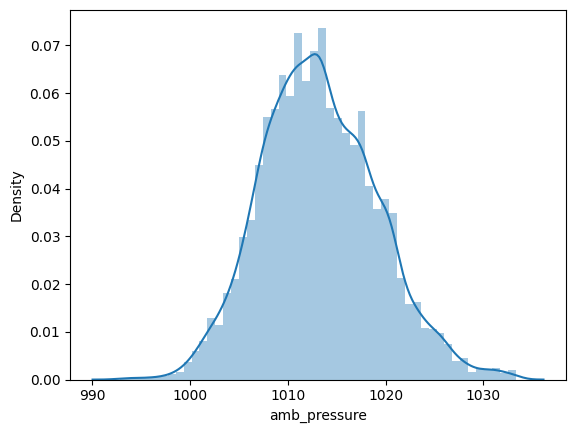

In [ ]:
sns.distplot(pp["amb_pressure"])

<Axes: xlabel='r_humidity', ylabel='Count'>

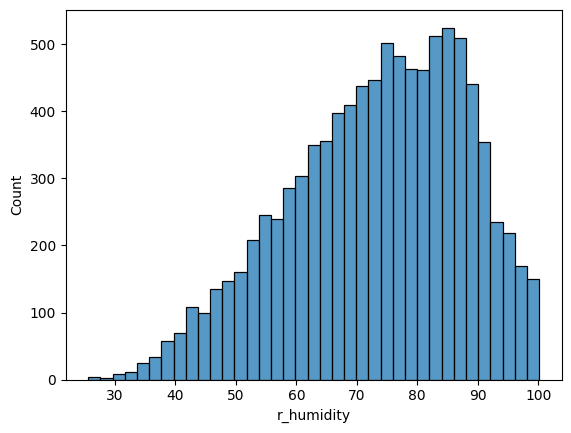

In [ ]:
sns.histplot(pp["r_humidity"])

<Axes: ylabel='energy_production'>

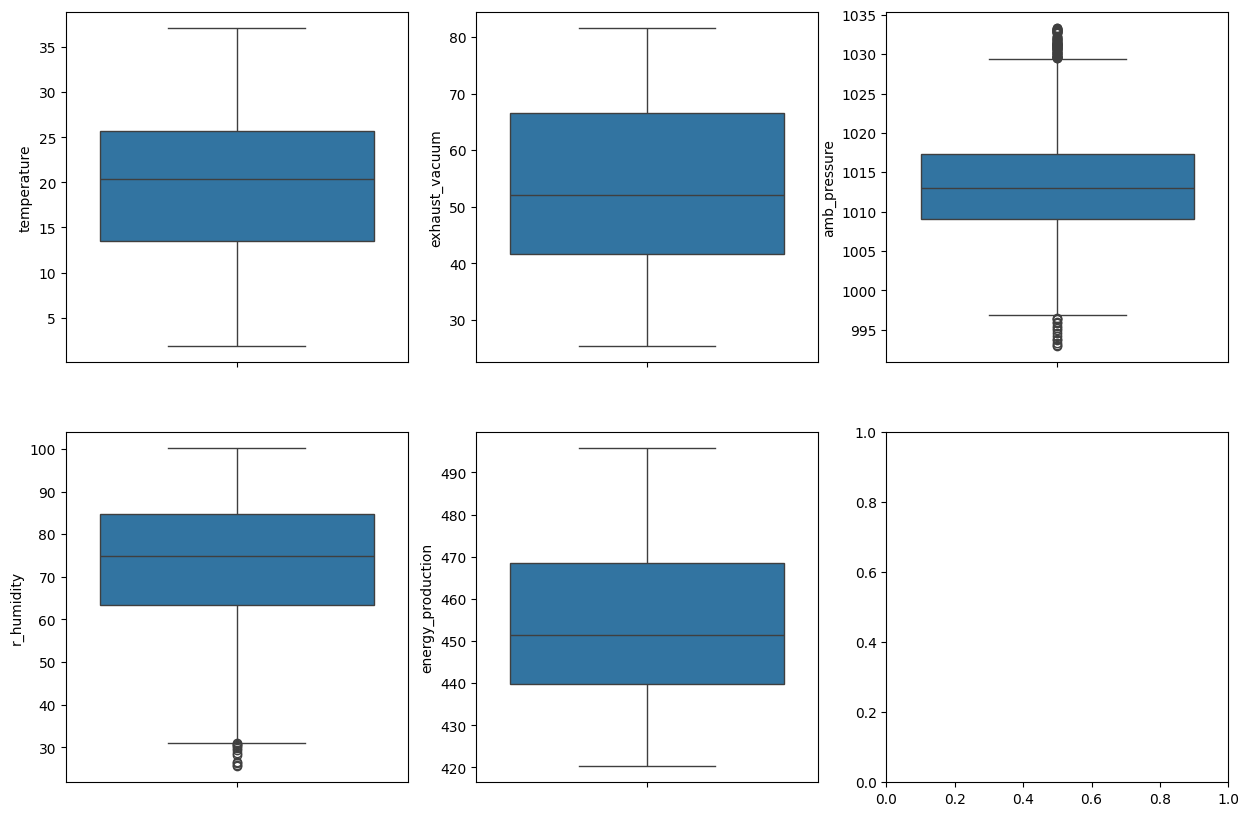

In [ ]:
# Box Plots to identify outliers in dataset
fig, ax = plt.subplots(2,3, figsize=(15,10))
sns.boxplot(pp.temperature, ax=ax[0,0])
sns.boxplot(pp.exhaust_vacuum,ax=ax[0,1])
sns.boxplot(pp.amb_pressure,ax=ax[0,2])
sns.boxplot(pp.r_humidity,ax=ax[1,0])
sns.boxplot(pp.energy_production,ax=ax[1,1])

In [ ]:
correlation_matrix = pp.corr()
correlation_matrix

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


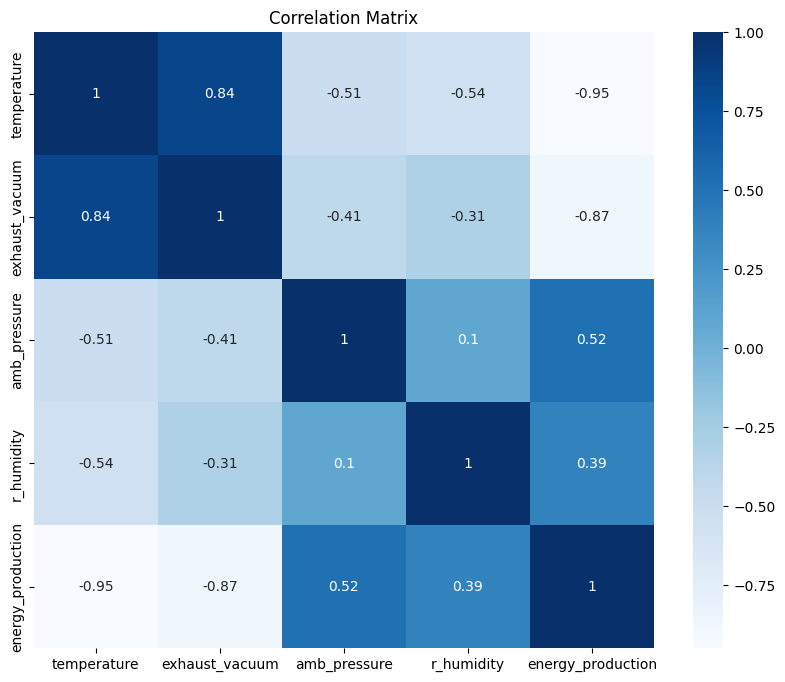

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

##Model Building - Multi Linear Regression with Raw data


In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
model1 = smf.ols('energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity', data = pp).fit()


In [ ]:
# Co-efficients
model1.params

Intercept         454.609274
temperature        -1.977513
exhaust_vacuum     -0.233916
amb_pressure        0.062083
r_humidity         -0.158054
dtype: float64

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:41:13   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        454.6093      9.749     46.634      0.000     435.500     473.718
temperature       -1.9775      0.015   -129.342      0.000      -2.007      -1.948
exhaust_vacuum    -0.2339      0.007    -32.122      0.000      -0.248      -0.220
amb_pressure       0.0621      0.009      6.564      0.000       0.044       0.081
r_humidity        -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Removal of Outlier by Using IQR method

In [ ]:
#amb_pressure
Q1=pp.amb_pressure.quantile(0.25)
Q3=pp.amb_pressure.quantile(0.75)
Q1, Q3

(1009.1, 1017.26)

In [ ]:
IQR=Q3-Q1
IQR

8.159999999999968

In [ ]:
lower_limit= Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit , upper_limit

(996.8600000000001, 1029.5)

In [ ]:
print(pp[(pp.amb_pressure<lower_limit)])

      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
962         16.03           41.23        996.35       82.04             464.67
2792        14.84           41.23        995.02       88.00             464.85
3395        18.15           41.23        993.82       61.21             456.32
4200        10.67           42.02        996.55       99.94             472.65
4237        12.95           41.23        993.74       96.35             469.05
4785        13.83           41.23        993.31       93.94             466.20
5170        14.13           41.23        994.60       93.02             467.84
5292        11.01           42.02        995.24       98.62             473.96
5565        15.62           41.23        992.89       83.99             463.21
5890         3.26           41.31        996.32      100.00             489.38
6424        16.21           41.23        995.88       80.00             463.09
7591        13.42           41.23        994.17     

In [ ]:
print(pp[(pp.amb_pressure>upper_limit)])

      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
38           9.95           41.82       1033.09       69.44             477.52
175          9.06           41.92       1029.90       90.88             473.37
315         14.46           42.86       1031.34       69.84             464.44
319         14.58           41.92       1030.42       61.96             462.69
385         14.20           42.86       1031.96       69.59             468.63
...           ...             ...           ...         ...                ...
9093         9.42           41.40       1030.38       87.80             472.99
9125         7.66           41.92       1031.96       82.48             485.11
9331         5.97           36.25       1029.65       86.74             487.03
9368        14.31           42.86       1031.14       69.60             465.36
9501        12.02           41.92       1030.10       84.45             465.82

[73 rows x 5 columns]


In [ ]:
outliers=pp[(pp.amb_pressure<lower_limit)|(pp.amb_pressure>upper_limit)]

In [ ]:
outliers.shape

(88, 5)

In [ ]:
pp1=pp.drop(pp[pp["amb_pressure"]<lower_limit].index).reset_index(drop="True")

In [ ]:
pp1=pp.drop(pp[pp["amb_pressure"]>upper_limit].index).reset_index(drop="True")
pp1.shape

(9495, 5)

In [ ]:
#r_humidity
Q1_r=pp1.r_humidity.quantile(0.25)
Q3_r=pp1.r_humidity.quantile(0.75)
Q1_r, Q3_r

(63.235, 84.845)

In [ ]:
IQR_r=Q3_r-Q1_r
IQR_r

21.61

In [ ]:
lower_limit= Q1_r-1.5*IQR_r
upper_limit = Q3_r+1.5*IQR_r
lower_limit , upper_limit

(30.82, 117.25999999999999)

In [ ]:
print(pp1[(pp1.r_humidity<lower_limit)])

      temperature  exhaust_vacuum  amb_pressure  r_humidity  energy_production
30          33.94           74.67       1015.94       28.16             427.98
231         34.65           74.67       1016.03       26.67             427.69
395         35.01           74.67       1016.10       26.30             428.48
1143        34.30           74.67       1015.98       25.89             427.84
1242        19.78           44.71       1015.70       29.43             465.49
1800        19.31           44.71       1016.13       30.59             463.00
5631        33.83           67.90       1005.94       29.86             428.12
6005        34.18           67.90       1005.87       30.34             425.50
6168        19.32           44.71       1015.30       28.81             464.38
7878        34.24           74.67       1016.24       25.56             425.58


In [ ]:
print(pp1[(pp1.r_humidity>upper_limit)])

Empty DataFrame
Columns: [temperature, exhaust_vacuum, amb_pressure, r_humidity, energy_production]
Index: []


In [ ]:
pp2=pp1.drop(pp1[pp1["r_humidity"]<lower_limit].index).reset_index(drop="True")

In [ ]:
pp2.shape

(9485, 5)

## Standardize data

In [ ]:
from sklearn.preprocessing import StandardScaler

col_names = pp2.columns
features = pp2[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
pp2_std = pd.DataFrame(features, columns = col_names)
pp2_std.head()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,-1.362891,-1.246628,0.677088,-0.908453,1.589962
1,-1.032983,-0.949016,1.148714,1.464228,0.653746
2,-0.786561,-0.733286,1.966663,0.573358,0.660794
3,-0.806760,-0.007364,0.830236,0.394223,0.753006
4,-0.615548,-0.374262,1.855282,0.114196,0.549200


## Model 2 after removing outliers and standardization


In [ ]:
model2 = smf.ols('energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity', data = pp2_std).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 3.061e+04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:41:14   Log-Likelihood:                -972.25
No. Observations:                9485   AIC:                             1955.
Df Residuals:                    9480   BIC:                             1990.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -8.83e-16      0.003  -3.21e-13      1.000      -0.005       0.005
temperature       -0.8619      0.007   -128.820      0.000      -0.875      -0.849
exhaust_vacuum    -0.1747      0.005    -32.084      0.000      -0.185      -0.164
amb_pressure       0.0241      0.003      7.321      0.000       0.018       0.031
r_humidity        -0.1356      0.004    -37.760      0.000      -0.143      -0.129
==============================================================================
Omnibus:                      895.459   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4098.568
Skew:                          -0.360   Prob(JB):                         0.00
Kurtosis:                       6.139   Cond. No.                         4.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residual analysis
## Test for normality of residuals (Q-Q Plot)

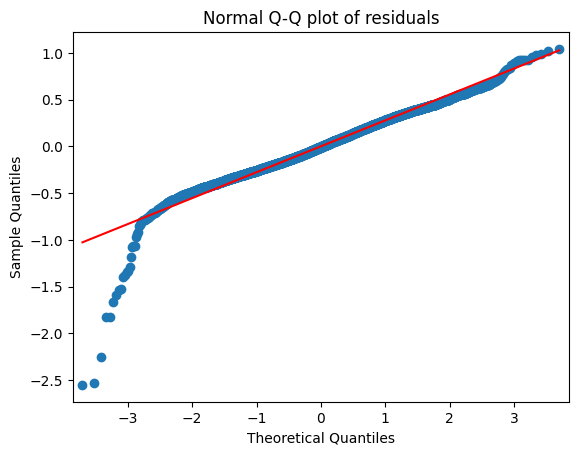

In [ ]:
qqplot=sm.qqplot(model2.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

Q-Q Plots-Not all residuals are lying on starignt line. There are outliers influencing Variables

In [ ]:
list(np.where(model2.resid<-1.1))

[array([1322, 1530, 1635, 2122, 2844, 3633, 5432, 5644, 6180, 7657, 7999,
        8030, 8649, 9133, 9483])]

Residual plot for homoscedasticity

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

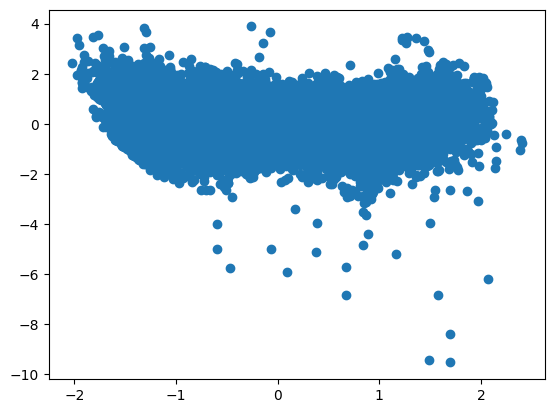

In [ ]:
plt.scatter(get_standardized_values(model2.fittedvalues),
            get_standardized_values(model2.resid))

In [ ]:
# Drop the influencing variables identified by the Q-Q plots
pp3= pp2_std.drop(pp2_std.index[[1322, 1530, 1635, 2122, 2844, 3633, 5432, 5644, 6180, 7657, 7999,8030, 8649, 9133, 9483]],axis=0).reset_index()
pp3

,index,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,0,-1.362891,-1.246628,0.677088,-0.908453,1.589962
1,1,-1.032983,-0.949016,1.148714,1.464228,0.653746
2,2,-0.786561,-0.733286,1.966663,0.573358,0.660794
3,3,-0.806760,-0.007364,0.830236,0.394223,0.753006
4,4,-0.615548,-0.374262,1.855282,0.114196,0.549200
...,...,...,...,...,...,...
9465,9479,0.287997,0.745327,1.225288,-0.308591,-0.505659
9466,9480,-0.351621,-0.370325,-1.320796,0.582280,0.181526
9467,9481,0.675808,0.861853,0.400377,-1.409482,-0.429306
9468,9482,1.444697,0.145379,-1.379967,-1.173380,-1.461846


In [ ]:
pp3= pp3.drop(["index"],axis=1)
pp3

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,-1.362891,-1.246628,0.677088,-0.908453,1.589962
1,-1.032983,-0.949016,1.148714,1.464228,0.653746
2,-0.786561,-0.733286,1.966663,0.573358,0.660794
3,-0.806760,-0.007364,0.830236,0.394223,0.753006
4,-0.615548,-0.374262,1.855282,0.114196,0.549200
...,...,...,...,...,...
9465,0.287997,0.745327,1.225288,-0.308591,-0.505659
9466,-0.351621,-0.370325,-1.320796,0.582280,0.181526
9467,0.675808,0.861853,0.400377,-1.409482,-0.429306
9468,1.444697,0.145379,-1.379967,-1.173380,-1.461846


In [ ]:
pp3.shape

(9470, 5)

##Model 3 after removing influencing variables identified by QQ Plots

In [ ]:
model3 = smf.ols('energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity', data = pp3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 3.283e+04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:41:15   Log-Likelihood:                -652.64
No. Observations:                9470   AIC:                             1315.
Df Residuals:                    9465   BIC:                             1351.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0027      0.003      1.002      0.317      -0.003       0.008
temperature       -0.8665      0.006   -133.786      0.000      -0.879      -0.854
exhaust_vacuum    -0.1724      0.005    -32.721      0.000      -0.183      -0.162
amb_pressure       0.0246      0.003      7.698      0.000       0.018       0.031
r_humidity        -0.1363      0.003    -39.241      0.000      -0.143      -0.129
==============================================================================
Omnibus:                       15.239   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.294
Skew:                           0.095   Prob(JB):                     0.000477
Kurtosis:                       2.946   Cond. No.                         4.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Regressors vs Residual
- All variables have some patterns and can be considered as significant variable

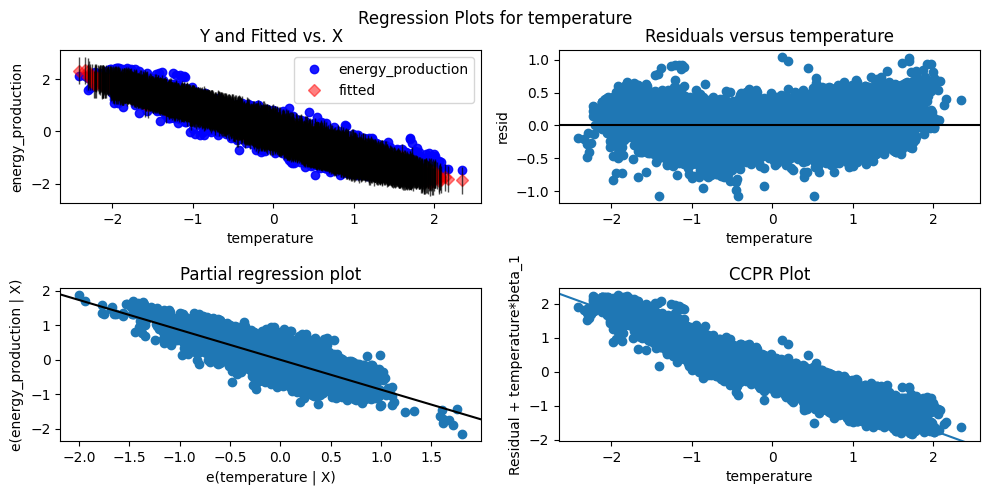

In [ ]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model3, "temperature", fig=fig)

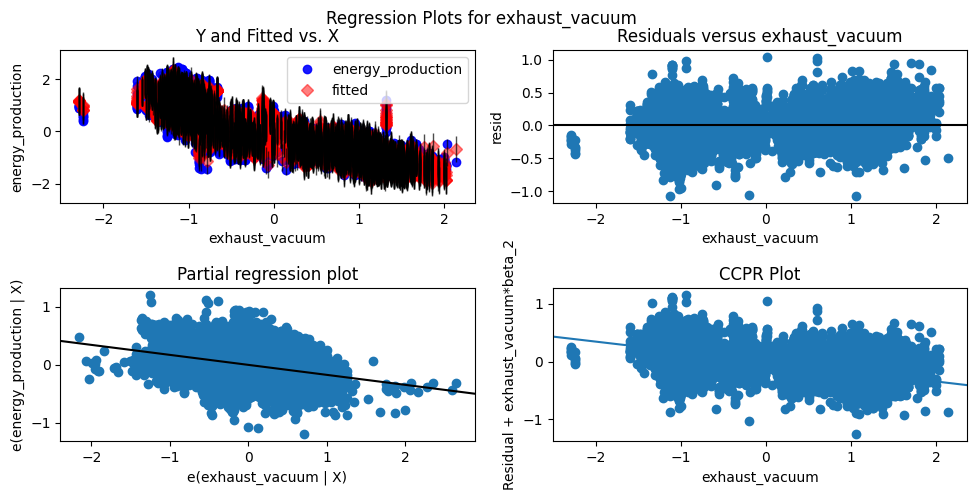

In [ ]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model3, "exhaust_vacuum", fig=fig)

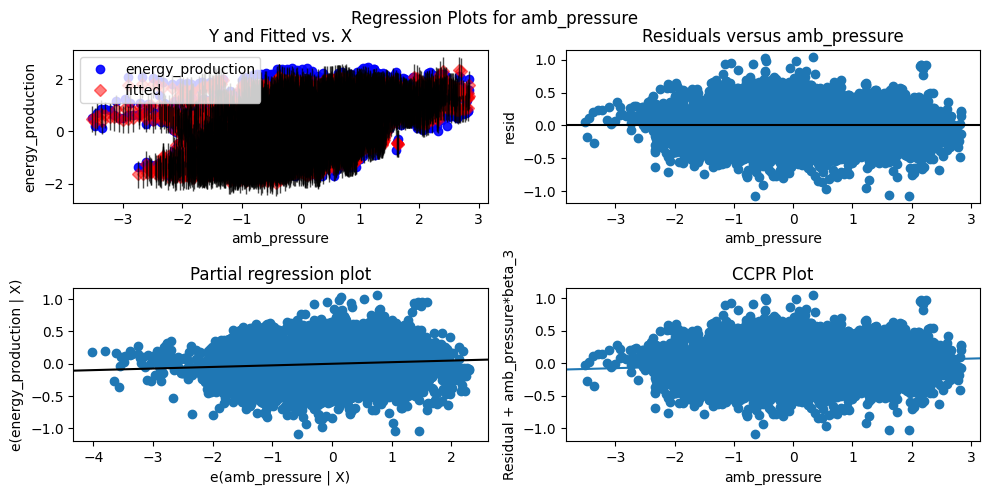

In [ ]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model3, "amb_pressure", fig=fig)

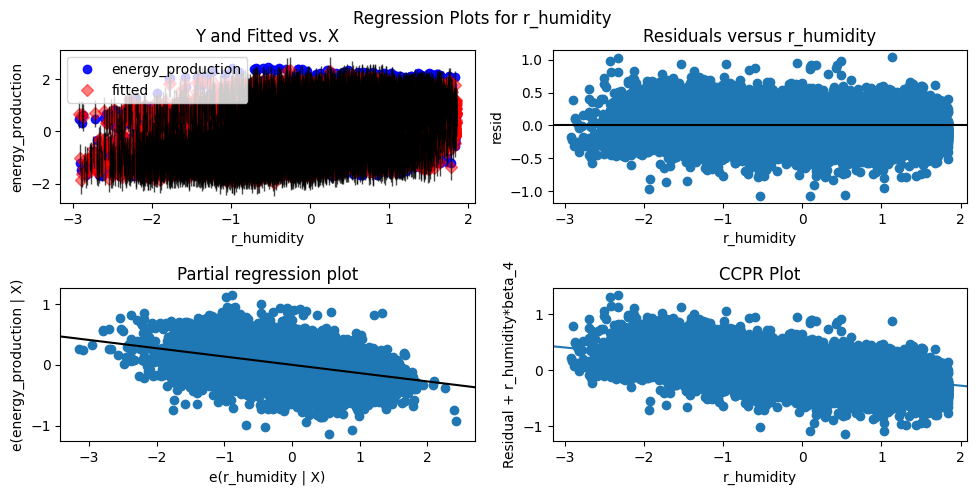

In [ ]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model3, "r_humidity", fig=fig)

##Calculating VIF

In [ ]:
rsq_temp= smf.ols('temperature~exhaust_vacuum+amb_pressure+r_humidity',data=pp3).fit().rsquared
vif_temp = 1/(1-rsq_temp)

rsq_vac= smf.ols('exhaust_vacuum~temperature+amb_pressure+r_humidity',data=pp3).fit().rsquared
vif_vac = 1/(1-rsq_vac)

rsq_amb= smf.ols('amb_pressure~temperature+exhaust_vacuum+r_humidity',data=pp3).fit().rsquared
vif_amb = 1/(1-rsq_amb)


rsq_hum= smf.ols('r_humidity~temperature+exhaust_vacuum+amb_pressure',data=pp3).fit().rsquared
vif_hum = 1/(1-rsq_hum)

# Storing vif values in a data frame
vif = {'Variables':['temperature','exhaust_vacuum','amb_pressure','r_humidity'],'VIF':[vif_temp,vif_vac,vif_amb,vif_hum]}
vif_df = pd.DataFrame(vif)
vif_df

,Variables,VIF
0,temperature,5.905418
1,exhaust_vacuum,3.912559
2,amb_pressure,1.434197
3,r_humidity,1.700087


## Model 4 using feature selection to check how Adj. R-squared changes

No much changes to Adj, R Squared values when dropping features

In [ ]:
model4 = smf.ols('energy_production~exhaust_vacuum+amb_pressure+r_humidity', data = pp3).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                 1.308e+04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:41:23   Log-Likelihood:                -5679.4
No. Observations:                9470   AIC:                         1.137e+04
Df Residuals:                    9466   BIC:                         1.140e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0023      0.005      0.515      0.607      -0.007       0.011
exhaust_vacuum    -0.7469      0.005   -143.784      0.000      -0.757      -0.737
amb_pressure       0.1971      0.005     39.731      0.000       0.187       0.207
r_humidity         0.1379      0.005     28.919      0.000       0.129       0.147
==============================================================================
Omnibus:                      167.144   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.356
Skew:                           0.273   Prob(JB):                     3.79e-43
Kurtosis:                       3.443   Cond. No.                         1.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model4a = smf.ols('energy_production~temperature+amb_pressure+r_humidity', data = pp3).fit()
model4a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 3.901e+04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:41:23   Log-Likelihood:                -1160.1
No. Observations:                9470   AIC:                             2328.
Df Residuals:                    9466   BIC:                             2357.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0027      0.003      0.969      0.333      -0.003       0.008
temperature     -1.0392      0.004   -262.326      0.000      -1.047      -1.031
amb_pressure     0.0122      0.003      3.644      0.000       0.006       0.019
r_humidity      -0.1751      0.003    -50.844      0.000      -0.182      -0.168
==============================================================================
Omnibus:                       10.186   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.216
Skew:                           0.080   Prob(JB):                      0.00605
Kurtosis:                       2.989   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model4b = smf.ols('energy_production~temperature+exhaust_vacuum+r_humidity', data = pp3).fit()
model4b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 4.349e+04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:41:23   Log-Likelihood:                -682.19
No. Observations:                9470   AIC:                             1372.
Df Residuals:                    9466   BIC:                             1401.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0027      0.003      0.996      0.319      -0.003       0.008
temperature       -0.8867      0.006   -149.216      0.000      -0.898      -0.875
exhaust_vacuum    -0.1676      0.005    -31.936      0.000      -0.178      -0.157
r_humidity        -0.1433      0.003    -42.600      0.000      -0.150      -0.137
==============================================================================
Omnibus:                       12.314   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.370
Skew:                           0.088   Prob(JB):                      0.00206
Kurtosis:                       2.976   Cond. No.                         4.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model4c = smf.ols('energy_production~temperature+exhaust_vacuum+amb_pressure', data = pp3).fit()
model4c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 3.721e+04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        03:41:23   Log-Likelihood:                -1366.4
No. Observations:                9470   AIC:                             2741.
Df Residuals:                    9466   BIC:                             2769.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0026      0.003      0.921      0.357      -0.003       0.008
temperature       -0.7166      0.006   -127.086      0.000      -0.728      -0.706
exhaust_vacuum    -0.2431      0.005    -45.512      0.000      -0.254      -0.233
amb_pressure       0.0572      0.003     17.236      0.000       0.051       0.064
==============================================================================
Omnibus:                       36.605   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.984
Skew:                           0.151   Prob(JB):                     9.31e-09
Kurtosis:                       2.955   Cond. No.                         3.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Model 5 using log transformation
Transformations are not useful in this model

Log Transformation

In [ ]:
model5 = smf.ols('energy_production~np.log(temperature)+np.log(exhaust_vacuum)+np.log(amb_pressure)+np.log(r_humidity)',data=pp3).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     169.5
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.11e-81
Time:                        03:41:23   Log-Likelihood:                 41.120
No. Observations:                 368   AIC:                            -72.24
Df Residuals:                     363   BIC:                            -52.70
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.0023      0.027    -36.791      0.000      -1.056      -0.949
np.log(temperature)       -0.1861      0.011    -17.213      0.000      -0.207      -0.165
np.log(exhaust_vacuum)    -0.2145      0.016    -13.512      0.000      -0.246      -0.183
np.log(amb_pressure)      -0.0176      0.011     -1.561      0.119      -0.040       0.005
np.log(r_humidity)        -0.0380      0.010     -3.682      0.000      -0.058      -0.018
==============================================================================
Omnibus:                        0.869   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.818
Skew:                           0.115   Prob(JB):                        0.664
Kurtosis:                       2.993   Cond. No.                         6.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##Model 6 using exponential transformation
Exponential Transformation

In [ ]:
model6 = smf.ols('np.log(energy_production)~temperature+exhaust_vacuum+amb_pressure+r_humidity',data=pp3).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     np.log(energy_production)   R-squared:                       0.631
Model:                                   OLS   Adj. R-squared:                  0.631
Method:                        Least Squares   F-statistic:                     1850.
Date:                       Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                               03:41:23   Log-Likelihood:                -4111.9
No. Observations:                       4332   AIC:                             8234.
Df Residuals:                           4327   BIC:                             8266.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.0078      0.023    -85.647      0.000      -2.054      -1.962
temperature       -1.1517      0.022    -52.040      0.000      -1.195      -1.108
exhaust_vacuum    -0.6851      0.027    -25.819      0.000      -0.737      -0.633
amb_pressure       0.0292      0.010      2.983      0.003       0.010       0.048
r_humidity        -0.0918      0.012     -7.428      0.000      -0.116      -0.068
==============================================================================
Omnibus:                     3845.246   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           236156.690
Skew:                          -3.974   Prob(JB):                         0.00
Kurtosis:                      38.287   Cond. No.                         6.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Split data into x & y and into Train and Test

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
pp3.shape

(9470, 5)

In [ ]:
x=pp3.iloc[:,0:4]
y=pp3.iloc[:,4]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)
x_test.shape,x_train.shape

((2841, 4), (6629, 4))

In [ ]:
y_test.shape,y_train.shape

((2841,), (6629,))

##Linear Regression

In [ ]:
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Evaluate Training Model
model_LR.score(x_train,y_train)

0.9325006086234955

In [ ]:
# Evaluate Testing Model
model_LR.score(x_test,y_test)

0.9333750316993412

In [ ]:
#Error calculation on training set
ytrain_predicted =model_LR.predict(x_train)
training_error = y_train - ytrain_predicted
training_error

2644    0.047435
8902    0.079574
5769   -0.322197
3422   -0.014199
5813    0.139752
          ...   
5734   -0.224998
5191    0.028493
5390   -0.506095
860    -0.085279
7270    0.051388
Name: energy_production, Length: 6629, dtype: float64

In [ ]:
#Mean Squared Error calculations on training set
train_mse = np.mean(training_error**2)
train_mse

0.06716969911489071

In [ ]:
#Root Mean Squared Error calculations on training set
train_rmse = np.sqrt(train_mse)
train_rmse

0.25917117724563954

In [ ]:
#Error calculation on testing set
ytest_predicted =model3.predict(x_test)
test_error = y_test - ytest_predicted
test_error

774     0.424775
8337   -0.005168
6213    0.297689
6209   -0.201216
2362    0.094161
          ...   
8388    0.369853
8097   -0.133607
6957    0.204313
9248   -0.226548
756    -0.249390
Length: 2841, dtype: float64

In [ ]:
#Mean Squared Error calculations on testing set
from sklearn.metrics import mean_squared_error, r2_score
test_mse = np.mean(test_error**2)
test_mse

0.06725769267091258

In [ ]:
train_mse,test_mse

(0.06716969911489071, 0.06725769267091258)

In [ ]:
y_pred_LR = model_LR.predict(x_test)
mse_LR = mean_squared_error(y_test, y_pred_LR)
print("Mean squared error:", mse_LR)

Mean squared error: 0.06731002209957174


##Decision Tree method

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
model_DT = DecisionTreeRegressor(max_depth = 3)
model_DT.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [ ]:
model_DT.score(x_train, y_train)

0.9157923183621366

In [ ]:
model_DT.score(x_test,y_test)

0.9102112182318924

In [ ]:
y_pred_DT = model_DT.predict(x_test)
mse_DT = mean_squared_error(y_test, y_pred_DT)
print("Mean squared error:", mse_DT)

Mean squared error: 0.09071201141637447


##Random Forest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=42, shuffle = True)
model_RF = RandomForestRegressor(n_estimators=num_trees, max_features=max_features, random_state=42)
results = cross_val_score(model_RF, x, y, cv=kfold)
model_RF.fit(x_train, y_train)
print(results.mean())

0.9694808126816816


In [ ]:
model_RF.score(x_train, y_train)

0.9953596572582661

In [ ]:
model_RF.score(x_test,y_test)

0.9662549263441275

In [ ]:
y_pred_RF = model_RF.predict(x_test)
mse = mean_squared_error(y_test, y_pred_RF)
print("Mean squared error:", mse)

Mean squared error: 0.034092048543698884


##XG BOOST

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
model_XG = XGBRegressor(booster='gbtree',max_depth =6, n_estimators=500, learning_rate=0.03,gamma=0.5, objective='reg:linear',max_leaves=10)
model_XG.fit(x_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.5, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=10,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [ ]:

model_XG.score(x_train, y_train)

0.9542584205969198

In [ ]:
model_XG.score(x_test,y_test)

0.9503547891271631

In [ ]:
y_pred_XG = model_XG.predict(x_test)
mse = mean_squared_error(y_test, y_pred_XG)
print("Mean squared error:", mse)


Mean squared error: 0.05015567476008107


##KNearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
num_folds = 10
kfold = KFold(n_splits=10)
model_KNN = KNeighborsRegressor(n_neighbors=15)
results = cross_val_score(model_KNN, x, y, cv=kfold)

In [ ]:
print(results.mean())

0.9519912308551908


In [ ]:
import numpy as np
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
model_KNN = KNeighborsRegressor()
grid = GridSearchCV(estimator=model_KNN, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [ ]:
# Kvalue = 4 the best accuracy of 95.51%.
print(grid.best_score_)
print(grid.best_params_)

0.9551342298215806
{'n_neighbors': 4}


In [ ]:
model_KNN.fit(x_train, y_train)
print(model_KNN.score(x_train, y_train))
print(model_KNN.score(x_test, y_test))

0.971049371807682
0.9517100550534523


In [ ]:
model_KNN.fit(x_train, y_train)
y_pred_KNN = model_KNN.predict(x_test)
mse = mean_squared_error(y_test, y_pred_KNN)
print("Mean squared error:", mse)

Mean squared error: 0.04878647366661627


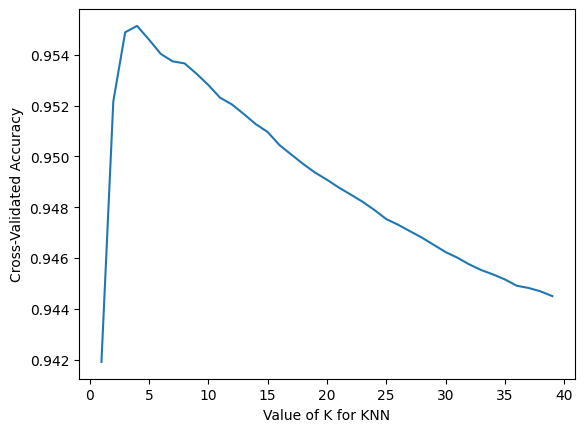

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range = range(1, 40)
k_scores = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=5)
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

##Support Vector Machines

In [ ]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

In [ ]:
model_SVR=SVR(kernel='rbf')
model_SVR.fit(x_train, y_train)

SVR()

In [ ]:
model_SVR.score(x_train, y_train)


0.9506315897241133

In [ ]:
model_SVR.score(x_test, y_test)

0.9482030769914268

In [ ]:
y_pred_SVR = model_SVR.predict(x_test)

In [ ]:
mse_SVR = mean_squared_error(y_test, y_pred_SVR)
print("Mean Squared Error:", mse_SVR)

Mean Squared Error: 0.05232951131268917


##Hyperparameter Tuning

In [ ]:
param_grid = {
    'C': [0.1,1,10,100],
    'gamma': [0.1,0.01,0.001,0.0001],
    'epsilon': [0.1,0.01,0.001,0.0001]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 50],
                         'epsilon': [0.1, 0.01, 0.001, 0.0001],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]})

In [ ]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 50, 'epsilon': 0.1, 'gamma': 0.1}


In [ ]:
# Re-train the model with best parameters
best_svr = grid_search.best_estimator_
best_svr.fit(x_train, y_train)

SVR(C=50, gamma=0.1)

In [ ]:
# Make predictions and evaluate
y_best = best_svr.predict(x_test)
mse_best = mean_squared_error(y_test, y_best)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04878647366661627


In [ ]:
r2_best = r2_score(y_test, y_best)
print("R2 Score:", r2_best)

R2 Score: 0.9487161572793111


Prediction Summary

In [ ]:
#Linear Regression Model
print("Train Accuracy:",model_LR.score(x_train,y_train))
print("Test Accuracy:",model_LR.score(x_test,y_test))
mse_LR = mean_squared_error(y_test, y_pred_LR)
print("Mean squared error:", mse_LR)

Train Accuracy: 0.9325006086234955
Test Accuracy: 0.9333750316993412
Mean squared error: 0.06731002209957174


In [ ]:
#Decision Tree Model
print("Train Accuracy:",model_DT.score(x_train, y_train))
print("Test Accuracy:",model_DT.score(x_test, y_test))
mse_DT = mean_squared_error(y_test, y_pred_DT)
print("Mean squared error:", mse_DT)

Train Accuracy: 0.9157923183621366
Test Accuracy: 0.9102112182318924
Mean squared error: 0.09071201141637447


In [ ]:
#Random Forest Model
print("Train Accuracy:",model_RF.score(x_train, y_train))
print("Test Accuracy:",model_RF.score(x_test, y_test))
mse_RF = mean_squared_error(y_test, y_pred_RF)
print("Mean squared error:", mse_RF)

Train Accuracy: 0.9953596572582661
Test Accuracy: 0.9662549263441275
Mean squared error: 0.034092048543698884


In [ ]:
#XGBoost Model
print("Train Accuracy:", model_XG.score(x_train, y_train))
print("Test Accuracy:", model_XG.score(x_test,y_test))
mse_XG = mean_squared_error(y_test, y_pred_XG)
print("Mean squared error:", mse_XG)

Train Accuracy: 0.9542584205969198
Test Accuracy: 0.9503547891271631
Mean squared error: 0.05015567476008107


In [ ]:
#KNearest Neighbor model
print("Train Accuracy:",model_KNN.score(x_train, y_train))
print("Test Accuracy:",model_KNN.score(x_test, y_test))
mse_KNN = mean_squared_error(y_test, y_pred_KNN)
print("Mean squared error:", mse_KNN)

Train Accuracy: 0.971049371807682
Test Accuracy: 0.9517100550534523
Mean squared error: 0.04878647366661627


In [ ]:
#Support Vector Machine model
print("Train Accuracy:",model_SVR.score(x_train, y_train))
print("Test Accuracy:",model_SVR.score(x_test, y_test))
mse_SVR = mean_squared_error(y_test, y_pred_SVR)
print("Mean Squared Error:", mse_SVR)

Train Accuracy: 0.9506315897241133
Test Accuracy: 0.9482030769914268
Mean Squared Error: 0.05232951131268917


Random Forest model has the highest Accuracy and least Errors

Regularizations

In [ ]:
!pip install scikit-learn==1.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 38.2 MB/s eta 0:00:00


In [ ]:
#Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 1)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred_ridge - y_test)**2)
print(mean_squared_error_ridge)

In [ ]:
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridge.coef_)
print(ridge_coefficient)


In [ ]:
#Lasso
from sklearn.linear_model import Lasso

In [ ]:
# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred_lasso - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

In [ ]:
# import model for ElasticNet
from sklearn.linear_model import ElasticNet

# Train the model
e_net = ElasticNet(alpha = .4,l1_ratio=.5)
e_net.fit(x_train, y_train)

# calculate the prediction and mean square error
y_pred_elastic = e_net.predict(x_test)
mean_squared_error = np.mean((y_pred_elastic - y_test)**2)
print("Mean Squared Error on test set", mean_squared_error)

e_net_coeff = pd.DataFrame()
e_net_coeff["Columns"] = x_train.columns
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_)
e_net_coeff
